In [1]:
import tensorflow as tf
import mtcnn
from mtcnn import MTCNN
import PIL
from PIL import Image
import numpy as np
import pandas as pd
from IPython.display import display
import os
import matplotlib.pyplot as pyplot

Using TensorFlow backend.


In [1]:
def extract_face(filename):
    #Open the File
    image = Image.open(filename)
    #print(filename)
    #Convert the file to RGB
    image = image.convert('RGB')
    
    #Convert the File to Numpy array to be machine readable
    pixels = np.asarray(image)
    
    #Creating a Face Detector using MTCNN
    detector = MTCNN()
    
    #Extracting Face embeddings from the Photo
    result = detector.detect_faces(pixels)
    if len(result) == 0:
        print ('Face in the photo {} could not be detected'.format(filename))
        return []
    else:
        x1, y1, width, height = result[0]['box']
        x1, y1 = abs(x1) , abs(y1)
        x2, y2 = abs(x1) + width , abs(y1) + height 
        face = pixels[y1:y2, x1:x2]
        image = Image.fromarray(face)
        image = image.resize((299,299))
        face_array = np.asarray(image)
        return face_array  

## Delete the "Faces" Folder before running the code below

In [51]:
new_faces = '../data/faces/'
os.mkdir(new_faces)

In [52]:
new_faces = '../data/faces/train/'
os.mkdir(new_faces)

Aditya Solanki


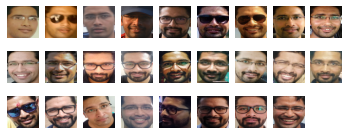

Ben Afflek


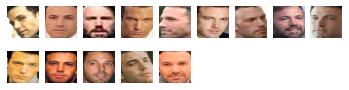

Elton John


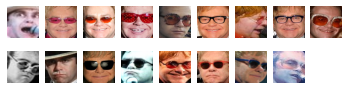

Jerry Seinfeld


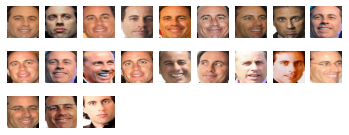

Madonna


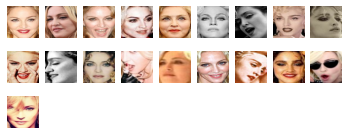

Mindy Kaling


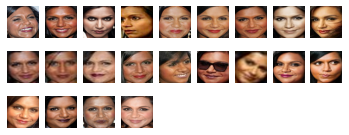

Unknown


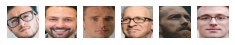

In [53]:
directory = '../data/train/'
for label in os.listdir(directory):
    print (label)
    if label == 'Readme.md' :
        continue
    else:
        path = os.path.join(directory,label)
        new_path  =  os.path.join(new_faces,label)
        os.mkdir(new_path)
        i = 1
        for image in os.listdir(path):
            sub_path = path + '/' + image
            new_pic = new_path + '/' + str(i) + '.jpg'
            #print (sub_path)
            #print (i)
            #print (new_pic)
            face = extract_face(sub_path)
            if len(face) == 0:
                continue
            else:
                image = Image.fromarray(face)
                image.save(new_pic)
                pyplot.subplot(5, 9, i)
                pyplot.axis('off')
                pyplot.imshow(face)
            i += 1
        pyplot.show()

In [54]:
new_faces = '../data/faces/val/'
os.mkdir(new_faces)

Aditya Solanki


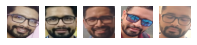

Ben Afflek


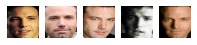

Elton John


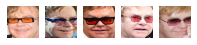

Jerry Seinfeld


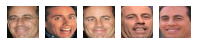

Madonna


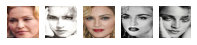

Mindy Kaling


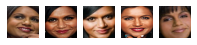

Unknown


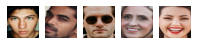

In [55]:
directory = '../data/val/'
for label in os.listdir(directory):
    print (label)
    if label == 'Readme.md' :
        continue
    else:
        path = os.path.join(directory,label)
        new_path  =  os.path.join(new_faces,label)
        os.mkdir(new_path)
        i = 1
        for image in os.listdir(path):
            sub_path = path + '/' + image
            new_pic = new_path + '/' + str(i) + '.jpg'
            #print (sub_path)
            #print (i)
            #print (new_pic)
            face = extract_face(sub_path)
            if len(face) == 0:
                continue
            else:
                image = Image.fromarray(face)
                image.save(new_pic)
                pyplot.subplot(5, 9, i)
                pyplot.axis('off')
                pyplot.imshow(face)
            i += 1
        pyplot.show()